# ISLP - Chapter 4 - Exercise 13
### Author: pzuehlke

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
weekly = pd.read_csv("Weekly.csv")
print(weekly.info())
weekly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB
None


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


__13 (a):__ First we convert `Direction` to a binary variable and obtain some
descriptive statistics for the data:

In [4]:
weekly["Direction"] = (weekly["Direction"] == "Up").astype(int)
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


Let's compute the correlations between the numeric variables:

In [5]:
weekly_minus_direction = weekly.drop(["Direction"], axis=1)
correlation = weekly_minus_direction.corr()
print(correlation)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


This table is hard to decipher, so let's plot the correlations using a heatmap:

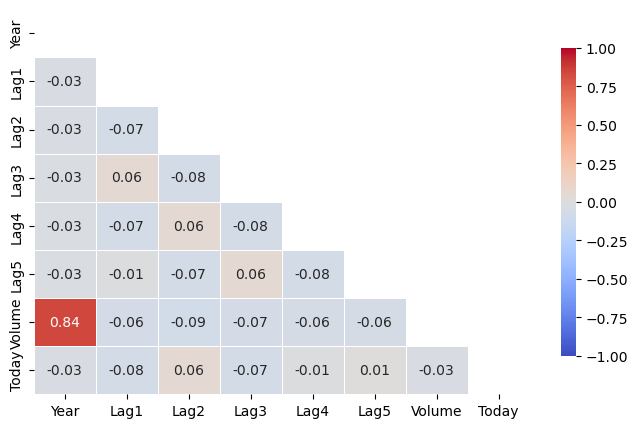

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
mask = np.triu(correlation)  # mask upper triangle to avoid redundancy
heatmap = sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    center=0,             # Center colormap at zero
    square=False,
    linewidths=0.5,       # Add borders between cells
    cbar_kws={"shrink": 0.8},
    mask=mask
)

From this we conclude that the only strong correlation seems to be between the
year and the volume of trades, with volume increasing as the years go by. Below
we also plot the scatter matrix of the predictors using seaborn:

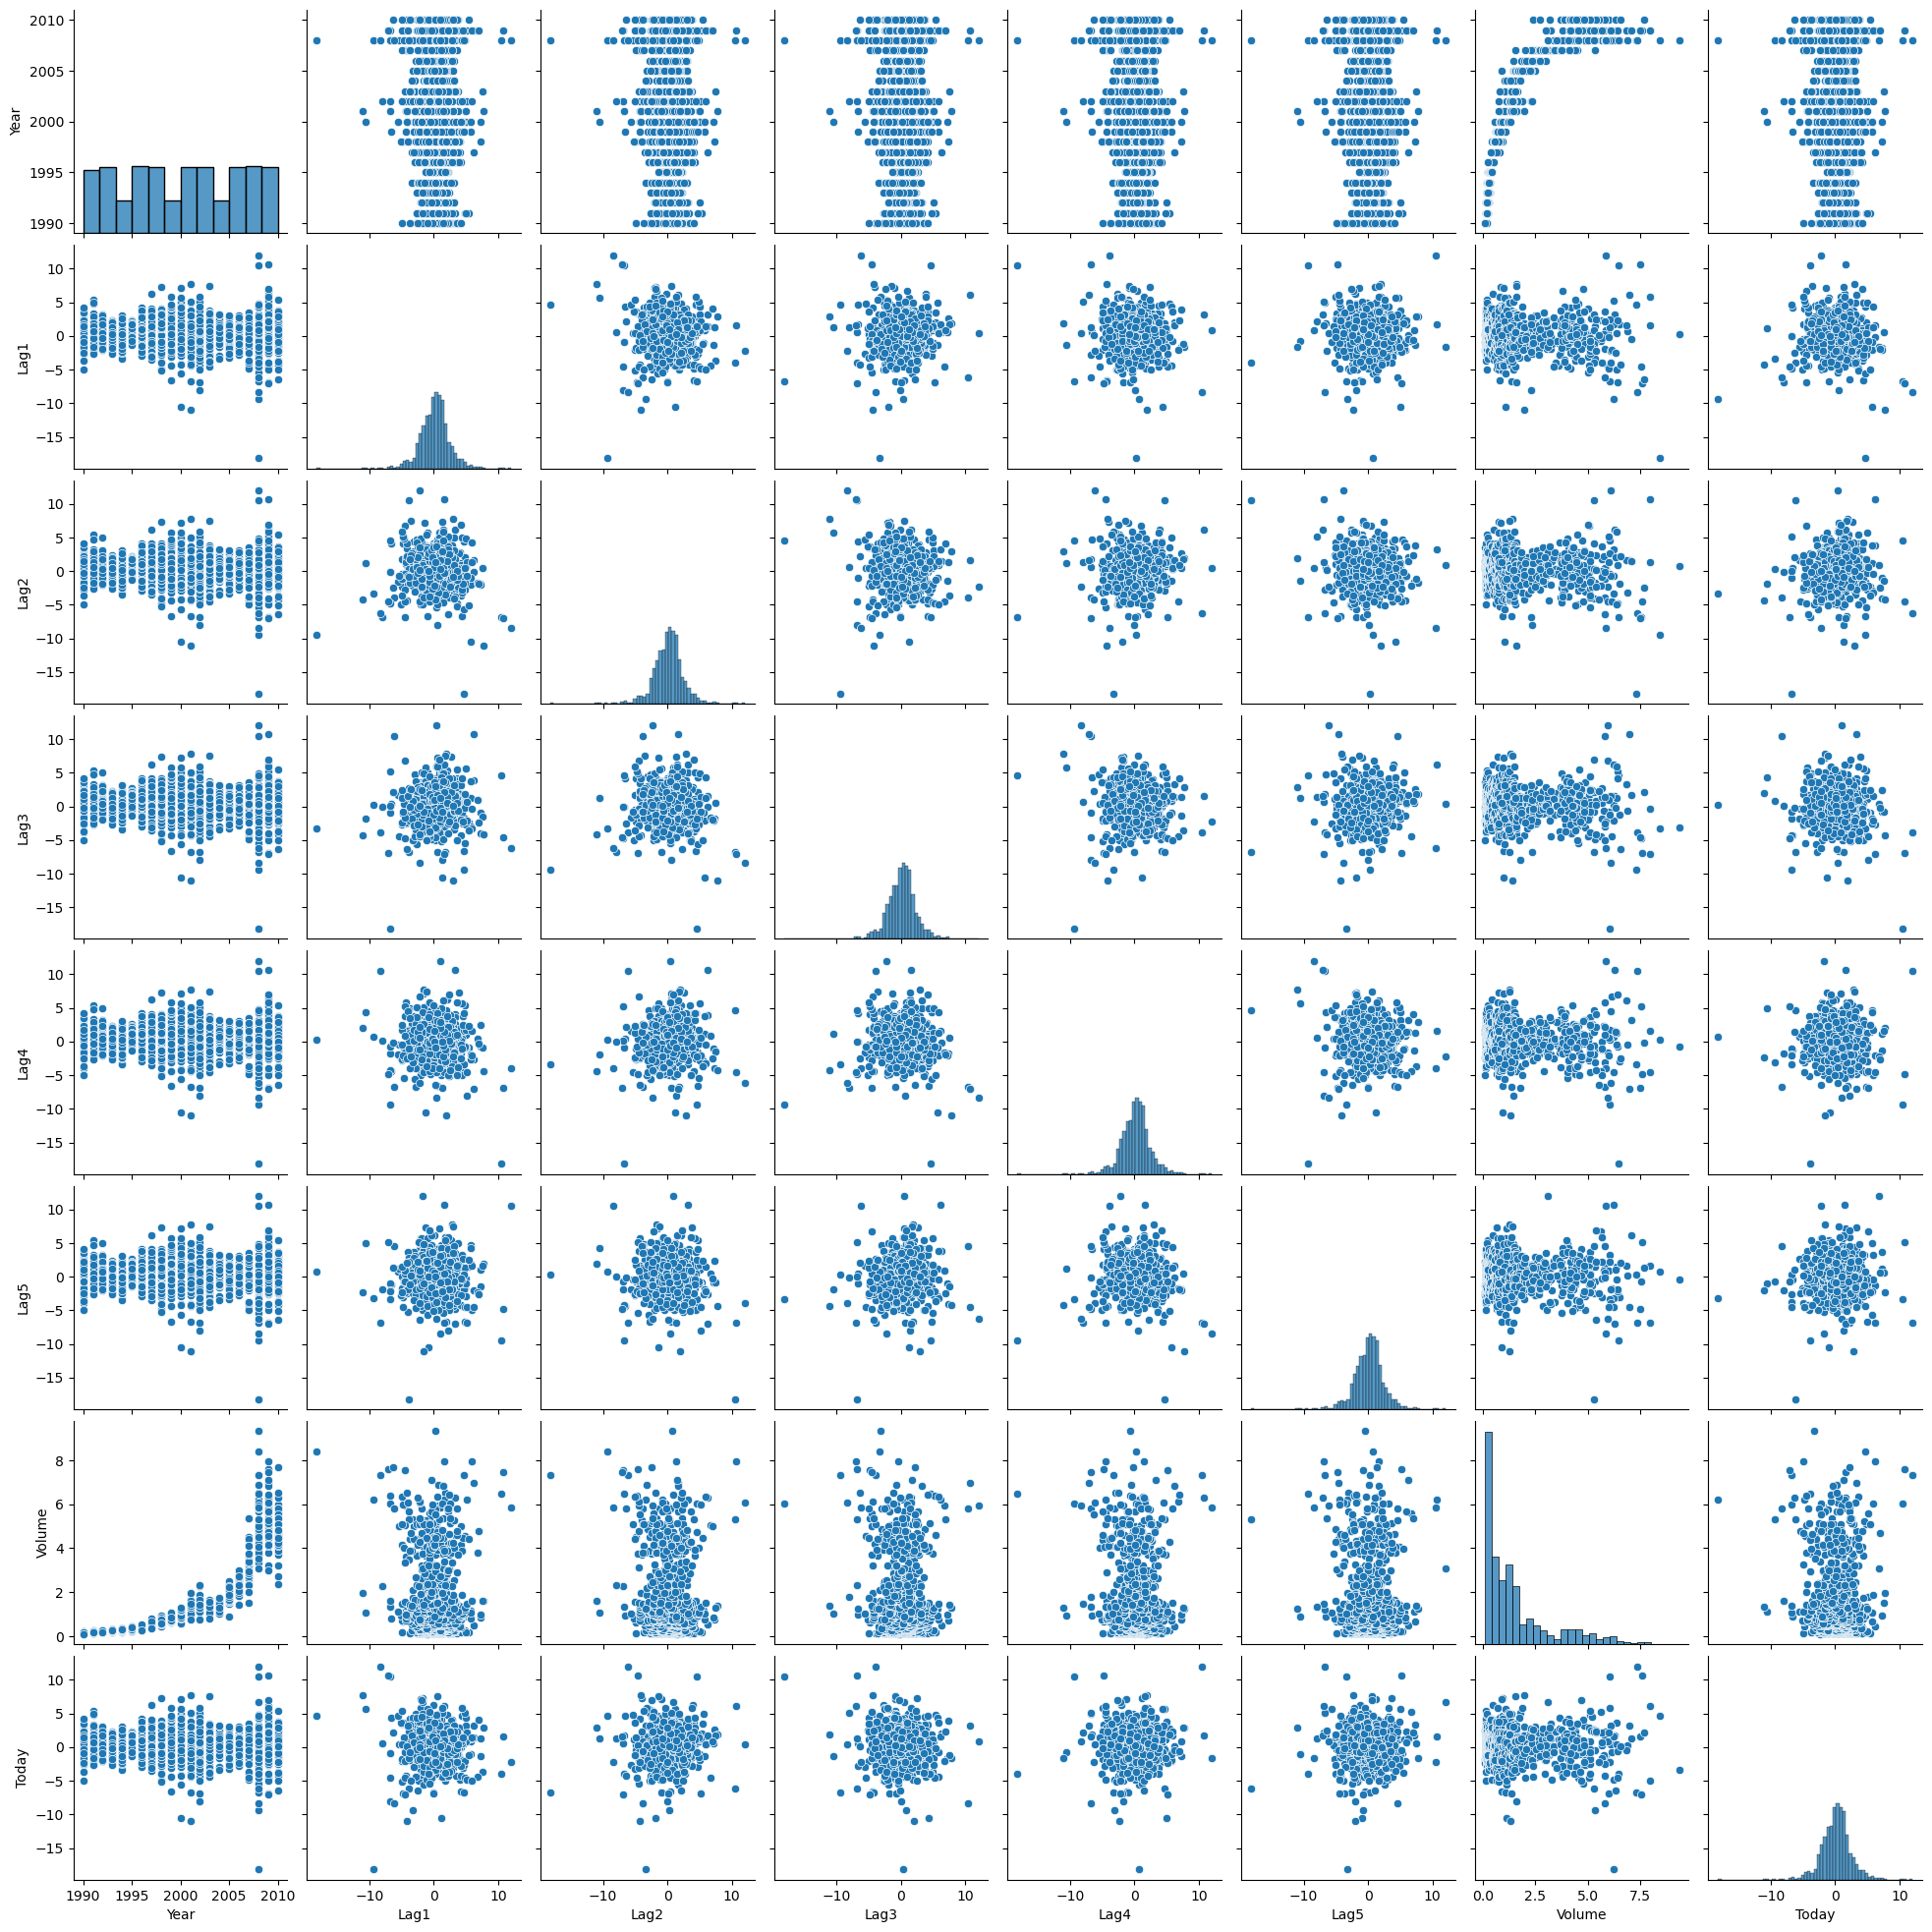

In [7]:
sns.pairplot(weekly_minus_direction)
plt.show()

Let's compute the overall distribution of the response variable `Direction`:

In [8]:
direction_counts = weekly["Direction"].value_counts()
n = len(weekly)
print(direction_counts)
print(f"Percentage of days where market went up: {direction_counts[1] / n:.4f}")
print(f"Percentage of days where market went down: {direction_counts[0] / n:.4f}")

Direction
1    605
0    484
Name: count, dtype: int64
Percentage of days where market went up: 0.5556
Percentage of days where market went down: 0.4444


__13 (b):__ The model is fit to the entire data below. From the summary we
deduce that the only predictor variable that seems to be statistically
significant with the direction of movement of the market is `Lag2`, with a $ p $-value of $ 3\% $.
`Lag` has a moderate $ p $-value of $ 12\% $, while the $ p $-values for the other lag variables
are large.

The coefficients of all lag variables are positive, suggesting that the market
displays some momentum.

However, the pseudo-$ R^2 $ of $ 0.66\% $ is quite low, implying
that the model explains very little of the variation in the outcome variable and
that it is only slightly better than a null model (with no predictors).

In [9]:
X = weekly.drop(["Direction", "Year", "Today"], axis=1)
y = weekly["Direction"]
X_with_const = sm.add_constant(X)

model = sm.Logit(y, X_with_const)
results = model.fit(disp=0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                0.006580
Time:                        18:55:37   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

__13 (c):__  First we compute the predicted probabilities on the training data,
then we convert those to actual predicted labels, and finally we determine the
confusion matrix (converted to a dataframe so that the results are presented in
a nice Markdown table):

In [10]:
predicted_probs = results.predict()
predicted_movements = (predicted_probs >= 0.5).astype(int)

conf_matrix = confusion_matrix(y, predicted_movements)
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual Down", "Actual Up"],
                                           columns=["Pred. Down", "Pred. Up"])
conf_matrix_df

,Pred. Down,Pred. Up
Actual Down,54,430
Actual Up,48,557


Now let's compute the accuracy, sensitivity and specificity:

In [11]:
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, predicted_movements)
print(f"Overall accuracy: {accuracy:.4f}")

sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Overall accuracy: 0.5611
Sensitivity: 0.9207
Specificity: 0.1116


We can see that our model is very poor, for it is essentially equivalent
to a model that always predicts that the stock market will go up. Because of this characteristic,
while its sensitivity is good ($ 92\% $), its specificity is very low ($ 11\%
$). The accuracy of $ 56.1\% $ is only slightly better than that of the model
which always predicts "Up" ($ 55.6 \% $, as computed in item (a)).

__13 (d):__ We begin by splitting the data into train and test sets, as specified in the statement of the exercise:

In [12]:
train_mask = weekly["Year"] <= 2008
test_mask = ~train_mask
train_data = weekly[train_mask]
test_data = weekly[test_mask]

y_train = train_data["Direction"]
X_train = train_data["Lag2"]
X_train = sm.add_constant(X_train)

y_test = test_data["Direction"]
X_test = test_data["Lag2"]
X_test = sm.add_constant(X_test)

We now fit the model on the training data. Here "iterations" refers to the
number of steps of some numerical procedure that tries to choose the parameters
so as to maximize likelihood.

In [13]:
model_lag2 = sm.Logit(y_train, X_train)
results_lag2 = model_lag2.fit()
results_lag2.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                0.003076
Time:                        18:55:44   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

Now let's compute the accuracy of the model on the held-out data:

In [14]:
predicted_probs = results_lag2.predict(X_test)
predicted = (predicted_probs > 0.5).astype(int)
accuracy = accuracy_score(predicted, y_test)
print(f"Accuracy on the test data: {accuracy:.4f}")

Accuracy on the test data: 0.6250


In [15]:
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual Down", "Actual Up"],
                                           columns=["Pred. Down", "Pred. Up"])
conf_matrix_df

,Pred. Down,Pred. Up
Actual Down,9,34
Actual Up,5,56


In [16]:
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Sensitivity: 0.9180
Specificity: 0.2093


We see that this model has a higher accuracy and higher specificity, while
mantaining almost the same sensitivity as the full model and being much more
interpretable. This result is even better if we take into account that these
estimates were obtained using a held-out test set, while in the model used in
item (b), the estimates were made on the basis of the training data itself.
Still, we can see that the newer model suffers from the same bias in that 
it predicts the overwhelming majority of daily directions as "Up".

__13 (e):__ The metrics obtained using LDA are exactly the same as those
obtained above using logistic regression. We need to redefine the train and test
feature matrices to remove the added constants and because sklearn expects dataframes:

In [17]:
X_train = train_data[["Lag2"]]
X_test = test_data[["Lag2"]]

In [18]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)  # Computes the labels directly (instead of probabilities)

In [19]:
lda_conf_matrix = confusion_matrix(y_test, lda_pred)
lda_conf_matrix_df = pd.DataFrame(lda_conf_matrix,
                                  index=["Actual Down", "Actual Up"],
                                  columns=["Pred. Down", "Pred. Up"])
lda_conf_matrix_df

,Pred. Down,Pred. Up
Actual Down,9,34
Actual Up,5,56


In [20]:
lda_accuracy = accuracy_score(lda_pred, y_test)
print(f"Accuracy on the test data: {lda_accuracy:.4f}")

Accuracy on the test data: 0.6250


In [39]:
tn, fp, fn, tp = lda_conf_matrix.ravel()
lda_sensitivity = tp / (tp + fn)
print(f"Sensitivity: {lda_sensitivity:.4f}")
lda_specificity = tn / (tn + fp)
print(f"Specificity: {lda_specificity:.4f}")

Sensitivity: 0.9180
Specificity: 0.2093


__13 (f):__ QDA predicts every movement to be "Up", so it is useless.

In [40]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_pred = qda_model.predict(X_test)  # Computes the labels directly (instead of probabilities)

In [41]:
qda_conf_matrix = confusion_matrix(y_test, qda_pred)
qda_conf_matrix_df = pd.DataFrame(qda_conf_matrix,
                                  index=["Actual Down", "Actual Up"],
                                  columns=["Pred. Down", "Pred. Up"])
qda_conf_matrix_df

,Pred. Down,Pred. Up
Actual Down,0,43
Actual Up,0,61


In [42]:
qda_accuracy = accuracy_score(qda_pred, y_test)
print(f"Accuracy on the test data: {qda_accuracy:.4f}")

Accuracy on the test data: 0.5865


In [43]:
tn, fp, fn, tp = qda_conf_matrix.ravel()
qda_sensitivity = tp / (tp + fn)
print(f"Sensitivity: {qda_sensitivity:.4f}")
qda_specificity = tn / (tn + fp)
print(f"Specificity: {qda_specificity:.4f}")

Sensitivity: 1.0000
Specificity: 0.0000


__13 (g):__ Using KNN the specificity and sensitivity are more balanced, but the
model has a lower accuracy than a model that flips an unbiased coin to predict
whether the market will move up or down. Thus, it is also not adequate for our
problem.

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)


In [32]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix_df = pd.DataFrame(knn_conf_matrix,
                                  index=["Actual Down", "Actual Up"],
                                  columns=["Pred. Down", "Pred. Up"])
knn_conf_matrix_df

,Pred. Down,Pred. Up
Actual Down,22,21
Actual Up,32,29


In [33]:
knn_accuracy = accuracy_score(knn_pred, y_test)
print(f"Accuracy on the test data: {knn_accuracy:.4f}")

Accuracy on the test data: 0.4904


In [37]:
tn, fp, fn, tp = knn_conf_matrix.ravel()
knn_sensitivity = tp / (tp + fn)
print(f"Sensitivity: {knn_sensitivity:.4f}")
knn_specificity = tn / (tn + fp)
print(f"Specificity: {knn_specificity:.4f}")

Sensitivity: 0.4754
Specificity: 0.5116


__13 (h):__ Naive Bayes always predicts that the market will go up on the test
data, so it also seems to be useless in our situation.

In [47]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [48]:
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_conf_matrix_df = pd.DataFrame(nb_conf_matrix,
                                  index=["Actual Down", "Actual Up"],
                                  columns=["Pred. Down", "Pred. Up"])
nb_conf_matrix_df

,Pred. Down,Pred. Up
Actual Down,0,43
Actual Up,0,61


In [49]:
nb_accuracy = accuracy_score(nb_pred, y_test)
print(f"Accuracy on the test data: {nb_accuracy:.4f}")

Accuracy on the test data: 0.5865


In [50]:
tn, fp, fn, tp = nb_conf_matrix.ravel()
nb_sensitivity = tp / (tp + fn)
print(f"Sensitivity: {nb_sensitivity:.4f}")
nb_specificity = tn / (tn + fp)
print(f"Specificity: {nb_specificity:.4f}")

Sensitivity: 1.0000
Specificity: 0.0000


__13 (i):__ Both LDA and logistic regression achieved the best performance, with
an accuracy of $ 62.5\% $ on the test data. However, the pseudo-$ R^2$ is poor
in both cases.